In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv'

df = pd.read_csv(dataset_path)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [2]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [3]:
df.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,146,146,146,146,146,146
Chinstrap,68,68,68,68,68,68
Gentoo,119,119,119,119,119,119


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [5]:
df.groupby('island').count()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,,,,,,
Biscoe,163,163,163,163,163,163
Dream,123,123,123,123,123,123
Torgersen,47,47,47,47,47,47


In [6]:
%pip install jupyter-summarytools -q

from summarytools import dfSummary
dfSummary(df)

Note: you may need to restart the kernel to use updated packages.


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,species[object],1. Adelie2. Gentoo3. Chinstrap,146 (43.8%)119 (35.7%)68 (20.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABl0lEQVR4nO3bQWrbUBSF4atiQjORMAYvxovoYrsI7cYEa9CETNRBhu0wOe/l6ftWcBN+bGR0pn3fCxJ+tD6A45iq6rmqnlof0pH3fd9fWx8xotPlcvk1z/O59SG92LbtZZqm34L7fKd5ns+32+11WZa31se09ng8fq7rer7f709VJbZPdqqqWpbl7Xq9/ml9TCeeWx8wKg8IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Ig5VX28x9X6kB74P3yt07ZtL+u6nst7XFX18aZuVb23vmNENgj/skH4IpMpHymjf7L5lOrI0OsqS6m+DLuuspTqz+jrKk/YHfGjLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZihl1Xjfg3fXdDr6sspfpig0CMdRUxHhCI6eFr1FfdQTSf8pnbHUfTKZ+53bH0MOUb7icX/s8DAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZimk75zO2OpfmUz9zuOGwQiDHlI+YvSryjSrcSH/QAAAAASUVORK5CYII="">",0(0.0%)
2,island[object],1. Biscoe2. Dream3. Torgersen,163 (48.9%)123 (36.9%)47 (14.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABm0lEQVR4nO3bQWrbABRF0a8iQjORMAYvxovoYrsI7cYYa9CETJRBRg0Z1Cl6kqxzVvBtLjYyfs00TQUJP5Y+gP1oquq5qp6WPmRD3qZpeln6iC1qj8fjr67rDksfshXjOF6bpvktuPu1XdcdzufzS9/3r0sfs3a32+3nMAyHy+XyVFViu1NbVdX3/evpdPqz9DEb8bz0AVvlAYEYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMW3Vx/+0lj5kC7xP/6cdx/E6DMOh/E/rn4zjeK2qt6Xv2CIbhPvZIHxTY8pHyl4+2XwarcAu1lUWUevw8Osqi6j12Mu6ypP2CvhRlxixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxD7+ueuTXtjW7WFdZRK2DDQIx1lXEeEAgZs6vUV9d/GW2KZ/5HJ/NMuUzn+Mrc075HvanFL7HAwIxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YmaZ8pnP8ZXZpnzmc3xmg0CMKR8x70q8o0ovbDR2AAAAAElFTkSuQmCC"">",0(0.0%)
3,bill_length_mm[float64],Mean (sd) : 44.0 (5.5)min < med < max:32.1 < 44.5 < 59.6IQR (CV) : 9.1 (8.0),163 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC5klEQVR4nO3dsU7bQBjA8e8SkpoQ2URRYWPpwFCpg8c8RB+2j9CBB0AMXTqxIUFkhBs3juMuBYUF4jsf9nf5//ZLPPyVxB/H2dR1LUDfDbq+AGAfR11fAF4zxhyLyNjhJdZ1Xa/aup6+INQeMcYcz+fz73Ecz2xf4/HxcWmM+RFarITaL+M4jmeLxWKVJEnRdHGWZdHV1dXs/v5+LCKECr+SJCnOzs7+WC4/bvVieoKbKahAqFCBUKFCr3+jOo5qghzTHKrehuo6qgl1THOoehuqOIxquh7TOHwTxNvtdtT29YSgz6GKiNOoppMxjcs3QVmWUVVVX4ui+CkituOpIPU+VIWsvwlub29nNzc3k81mM/R1cVoRqic23wTL5TLIYX0bGE9BBUKFCoQKFYL9jVpV1UhEYmOM7UsMRGRrsY4RkwdBhprn+agsy28XFxfD4XDYeLtcVVWjPM+/TKfT34PBoGyylhGTH0GGul6vj6IomqRpWpyfny+brv8/JvqcpumvpusZMfkRZKjPTk5OrP5Y8DwmslnPiMkPbqagAqFCBUKFCoQKFbzeTDlufGYeiRfeQnXd+Mw8Ert8fqI6/Y8680js8j5Htd34zDwSu7iZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUCHoYycPkeNJ2719LCehBsT1pO0+P5aTUAPictJ214/lfA+hBsj2pG3p6LGc++BmCioQKlQgVKhAqFDh3Zsph1OjOTEarXkzVJdTozkxGm167xPV+tRoToxGm/aao9qcGs2J0WgTA3+8aOGJ3N72ChAqRMR9n4CI370ChAoRcX8it++9AoSKVxz2CUhVVbF42mJIqGiF7y2Ge4WaZVnU9I2fnp4iEZE8z6O7u7vJR67X+t5ar1tE5OHhYRpF0eTy8tKcnp7+bbJ2tVp9ur6+fvNnwz+sR5sOtRA5oAAAAABJRU5ErkJggg=="">",0(0.0%)
4,bill_depth_mm[float64],Mean (sd) : 17.2 (2.0)min < med < max:13.1 < 17.3 < 21.5IQR (CV) : 3.1 (8.7),79 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyUlEQVR4nO3cu47aQBSA4TNhQQMotrgIOl5gpRRINDTpUuZh06bbAqTUvAENQkJcBFkLY0iRpFhpw+LLLHOc/+uNXfzCOzPLMZfLRQDffbj3AwC3eLj3A+AlY0xdRGo5PuJ4uVyei3oeXxCqR4wx9U6n8zUIglbWz9jtdmtjzLeyxUqofqkFQdAaj8fPYRhGaS/ebrd2Mpm0VqtVTUQIFdfleH0H5/O5Gobhutfr/cx4+3rG67xGqAXL8/qO49gmSfIYRdGTiGQNtZQItXiZX9/z+bw1m80ap9Op4urhtCJUR8IwjNK+vtfrdSlf20VgHxUqECpUIFSoQKhQgVChAqFCBUKFCoQKFdjw/4e85/VFP8//jlBfwXm9fwj1dZzXe4ZQr+C83h8spqAC36glkyRJVUQCY0yWy739vRWhlsjhcKjGcfxpMBhUKpVK6p+y+Px7K0ItkePx+GCtbQyHw6jf76/TXOv7760ItYSazWbqReAf3i4EWUxBB

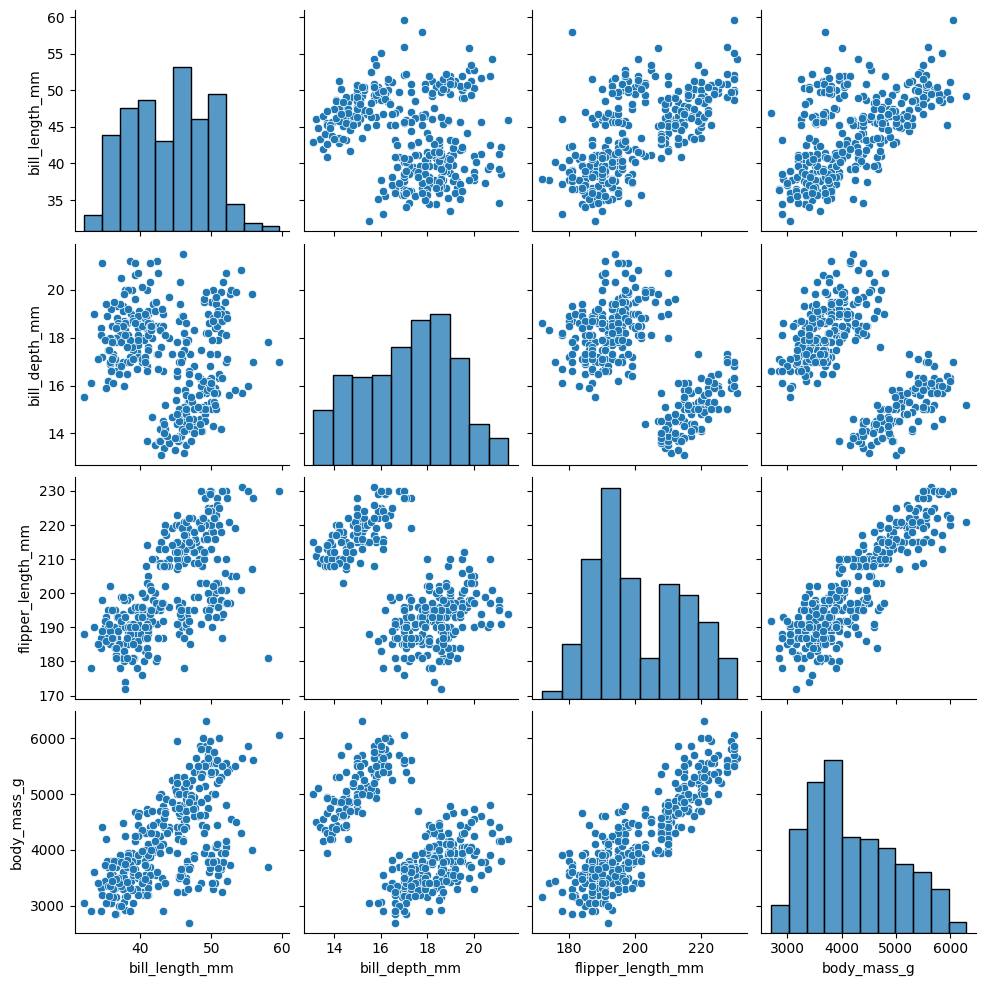

In [7]:
sns.pairplot(df);

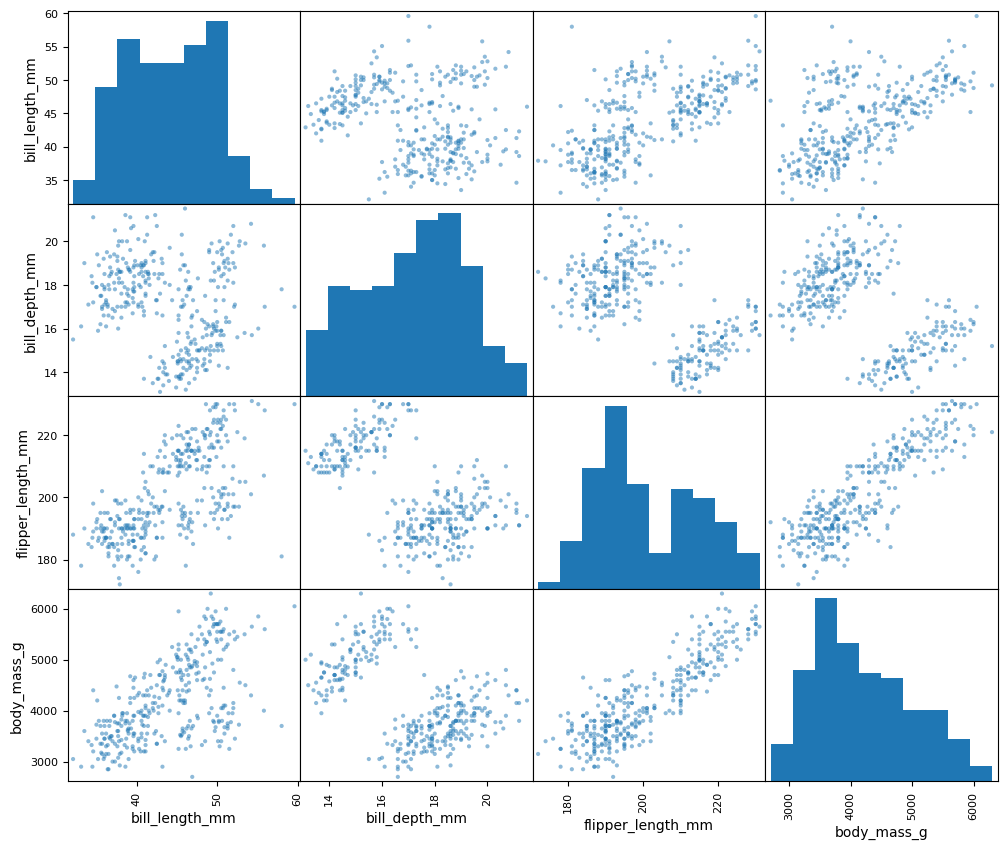

In [20]:
pd.plotting.scatter_matrix(df, figsize=(12,10));

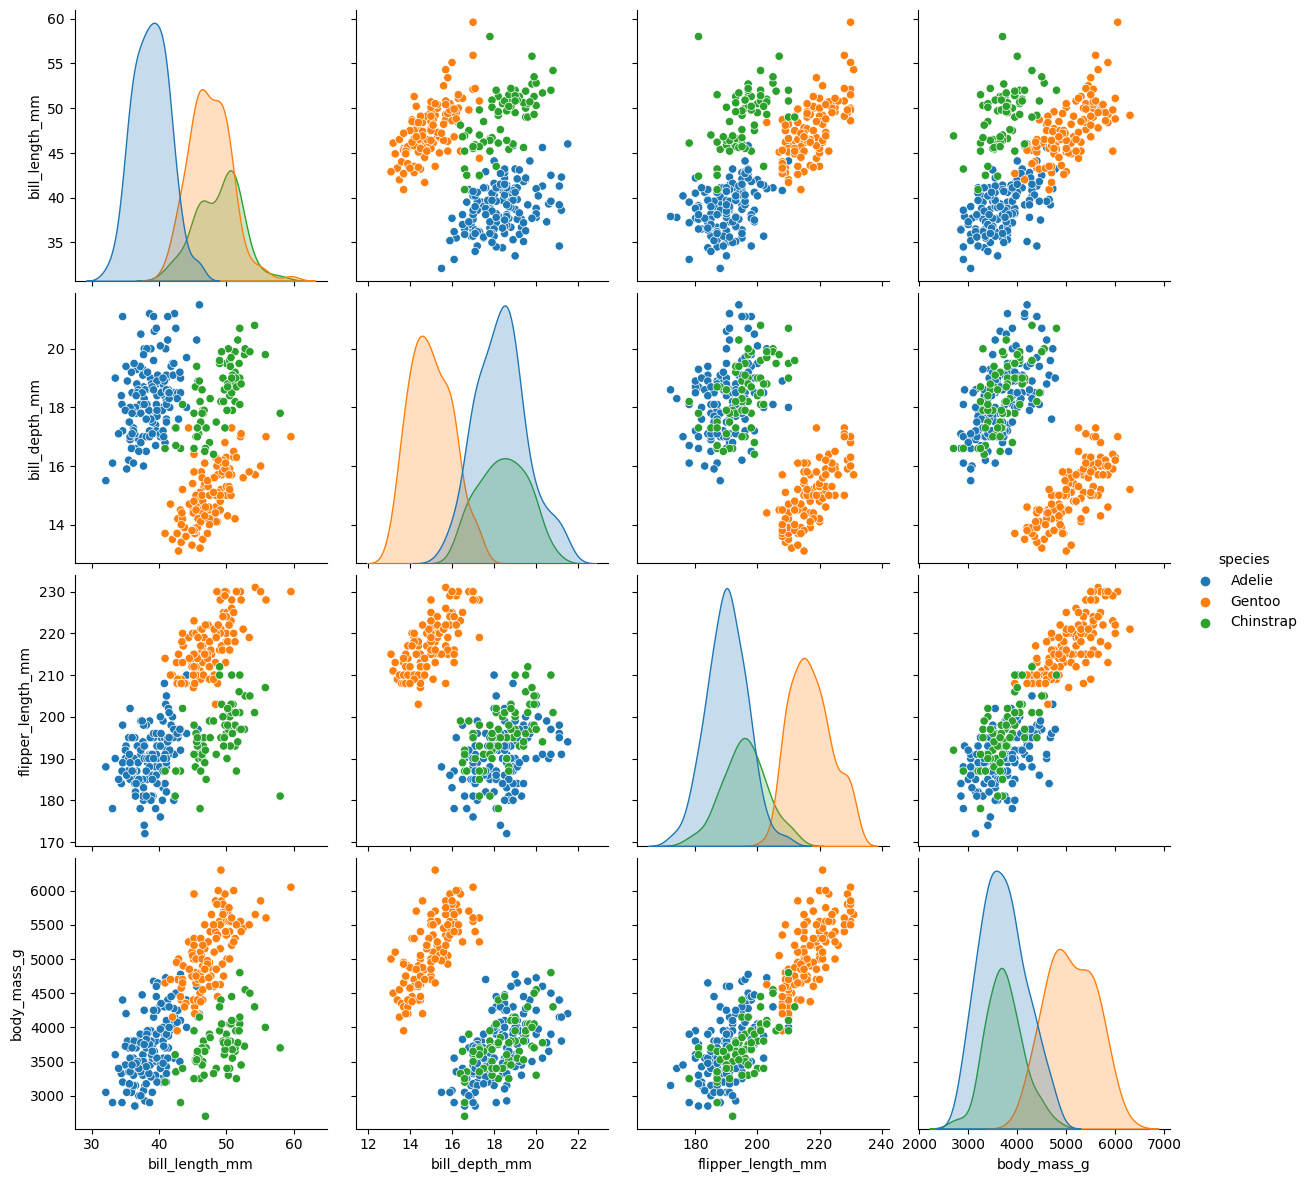

In [8]:
sns.pairplot(df, hue='species', height=3, aspect=1);

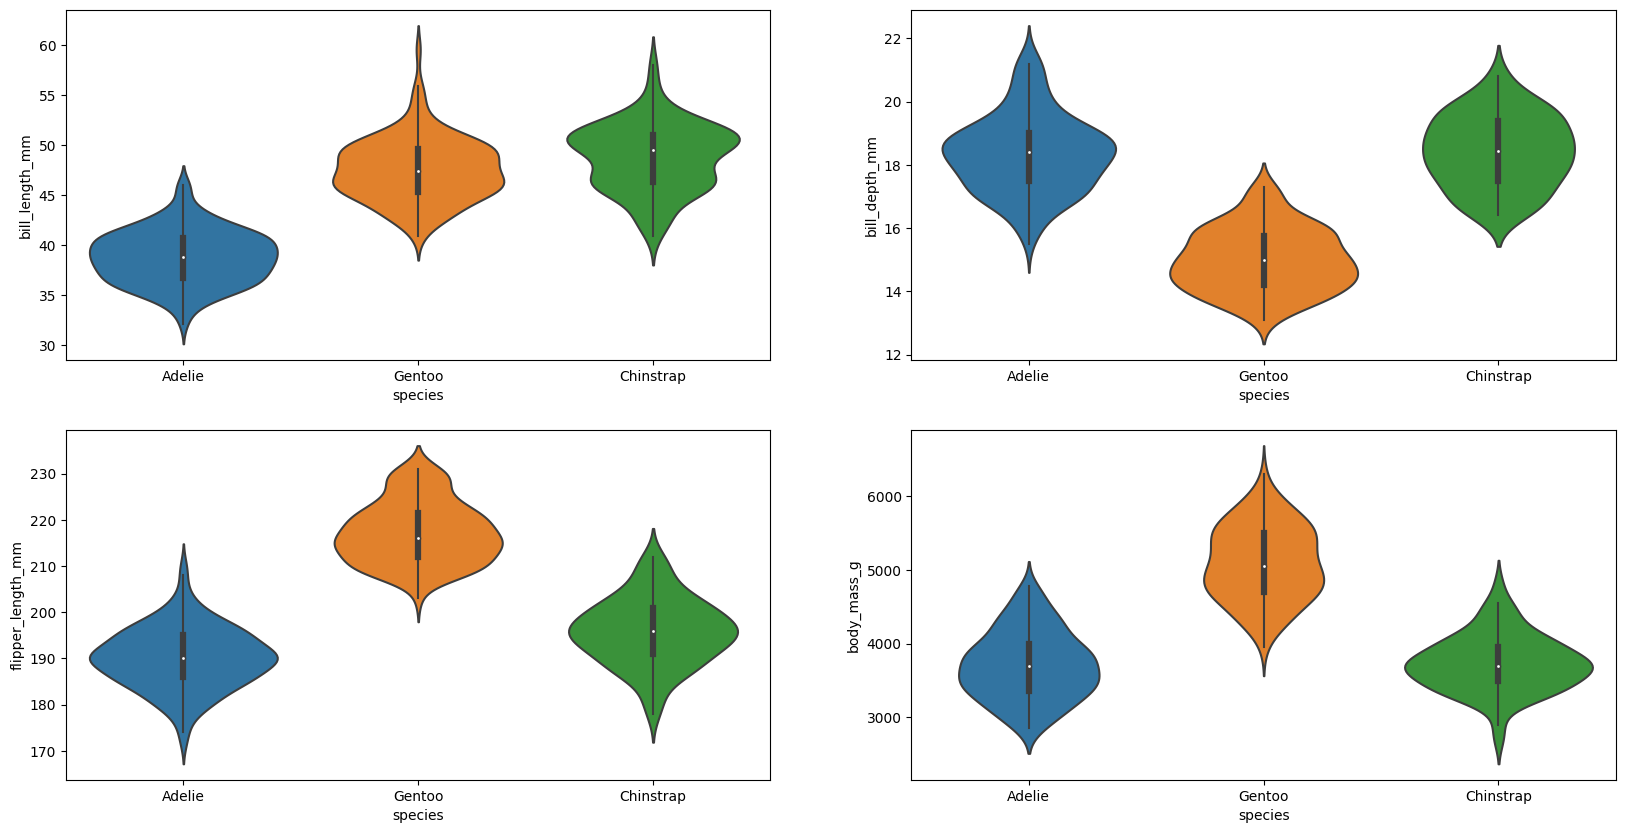

In [9]:
plt.figure(figsize=(20,10));

# subplot su matrice 2x2

plt.subplot(2,2,1)
sns.violinplot(x='species', y='bill_length_mm', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species', y='bill_depth_mm', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species', y='flipper_length_mm', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species', y='body_mass_g', data=df);

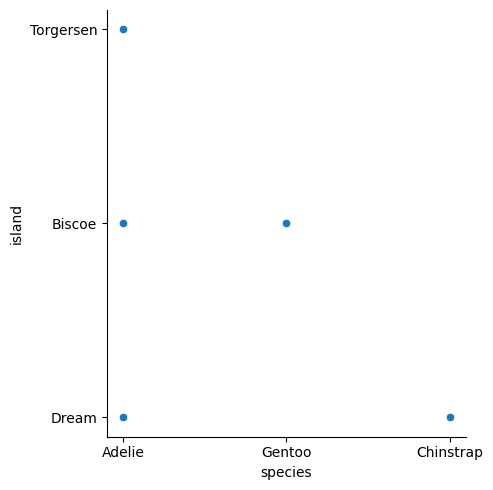

In [10]:
sns.relplot(x = "species", y = "island", data=df)

In [11]:
df = pd.get_dummies(df, columns=["island","sex"])


In [12]:
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,Adelie,39.1,18.7,181,3750,0,0,1,0,1
1,Adelie,39.5,17.4,186,3800,0,0,1,1,0
2,Adelie,40.3,18.0,195,3250,0,0,1,1,0
3,Adelie,36.7,19.3,193,3450,0,0,1,1,0
4,Adelie,39.3,20.6,190,3650,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207,4000,0,1,0,0,1
329,Chinstrap,43.5,18.1,202,3400,0,1,0,1,0
330,Chinstrap,49.6,18.2,193,3775,0,1,0,0,1
331,Chinstrap,50.8,19.0,210,4100,0,1,0,0,1


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
import joblib
import streamlit as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
X = df.drop(columns="species")
y = df["species"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 667)

In [16]:
model = LogisticRegression(fit_intercept=True)
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

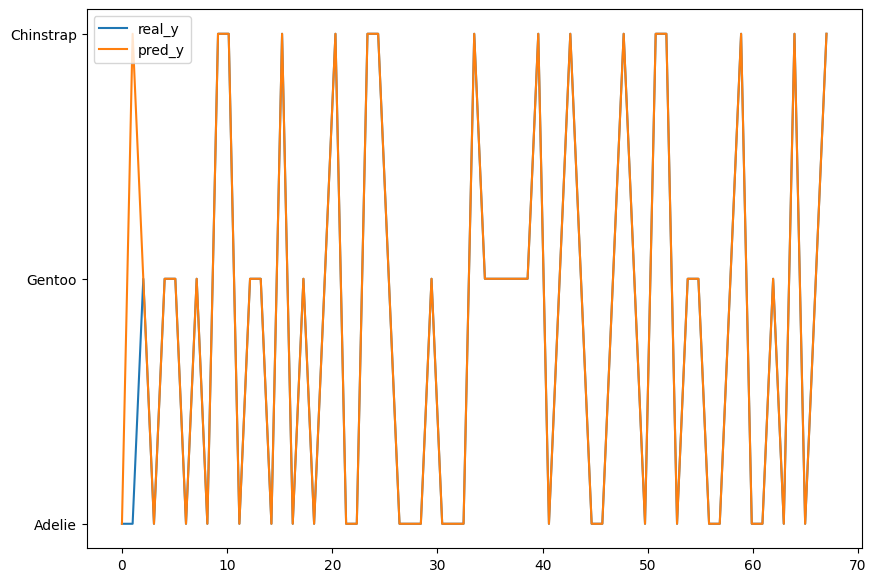

In [18]:
l = y_test_pred.shape[0]
x = np.linspace(0,l,l)

plt.figure(figsize=(10,7))
plt.plot(x, y_test, label="real_y")
plt.plot(x,y_test_pred, label="pred_y")
plt.legend(loc=2);

In [19]:
joblib.dump(model,'regression_penguins.pkl')

['regression_penguins.pkl']

In [20]:
newmodel = joblib.load('regression_penguins.pkl')
newmodel

LogisticRegression()

In [21]:
acc = accuracy_score(y_test,y_test_pred)
print(f"L'accuracy totale è: {round(acc,2)*100}%")

L'accuracy totale è: 99.0%


In [50]:
y_pred = model.predict([[37.5, 18.5, 199, 4475, 0, 1, 0, 0, 1]])
y_pred

array(['Adelie'], dtype=object)

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
scores

array([0.97014925, 0.98507463, 0.98507463, 1.        , 0.98484848])

In [23]:
acc_cv = np.mean(scores).round(3)
acc_cv

0.985

<Axes: >

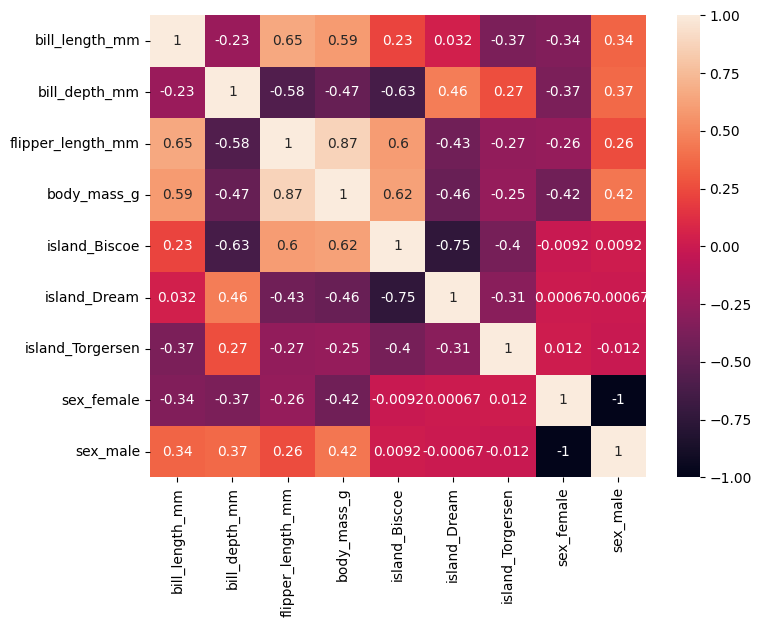

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)  # annot display corr label

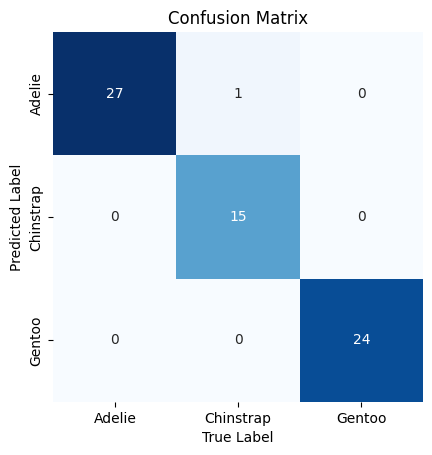

In [25]:
from sklearn.metrics import confusion_matrix

labels = ['Adelie', 'Chinstrap', 'Gentoo']

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm , square=True, annot=True, cbar=False,cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label');